In [1]:
import numpy as np 
import pandas as pd

In [2]:
data=pd.read_csv('/kaggle/input/signal-time-optimizer/Traffic.csv')

In [3]:
data['Weighted Count']=(
    data['BikeCount'] * 1 +
    data['CarCount'] * 2 +
    data['BusCount'] * 5 +
    data['TruckCount'] * 5
)

In [4]:
data.replace('low',1,inplace=True)
data.replace('normal',2,inplace=True)
data.replace('high',3,inplace=True)
data.replace('heavy',4,inplace=True)

/tmp/ipykernel_38/1201582858.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('heavy',4,inplace=True)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and labels
X = data[['Weighted Count']]
y = data['Traffic Situation']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
lr.score(X,y)

Logistic Regression:
[[  7  59   0   0]
 [  0 320  15   5]
 [  0  17  29  17]
 [  0   0  14 113]]
              precision    recall  f1-score   support

           1       1.00      0.11      0.19        66
           2       0.81      0.94      0.87       340
           3       0.50      0.46      0.48        63
           4       0.84      0.89      0.86       127

    accuracy                           0.79       596
   macro avg       0.79      0.60      0.60       596
weighted avg       0.80      0.79      0.75       596



0.8057795698924731

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dt.score(X,y)

Decision Tree:
[[ 26  40   0   0]
 [ 13 305  16   6]
 [  0  24  26  13]
 [  0   5  15 107]]
              precision    recall  f1-score   support

           1       0.67      0.39      0.50        66
           2       0.82      0.90      0.85       340
           3       0.46      0.41      0.43        63
           4       0.85      0.84      0.85       127

    accuracy                           0.78       596
   macro avg       0.70      0.64      0.66       596
weighted avg       0.77      0.78      0.77       596



0.8256048387096774

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
rf.score(X,y)

Random Forest:
[[ 26  40   0   0]
 [ 12 301  20   7]
 [  0  21  27  15]
 [  0   2  14 111]]
              precision    recall  f1-score   support

           1       0.68      0.39      0.50        66
           2       0.83      0.89      0.86       340
           3       0.44      0.43      0.44        63
           4       0.83      0.87      0.85       127

    accuracy                           0.78       596
   macro avg       0.70      0.65      0.66       596
weighted avg       0.77      0.78      0.77       596



0.8259408602150538

In [9]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
svm.score(X,y)

SVM:
[[ 16  50   0   0]
 [  1 319  15   5]
 [  0  17  27  19]
 [  0   0  13 114]]
              precision    recall  f1-score   support

           1       0.94      0.24      0.39        66
           2       0.83      0.94      0.88       340
           3       0.49      0.43      0.46        63
           4       0.83      0.90      0.86       127

    accuracy                           0.80       596
   macro avg       0.77      0.63      0.65       596
weighted avg       0.80      0.80      0.78       596



0.8155241935483871

In [10]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    # "Gradient Boosting": gb,
    "SVM": svm
}

for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.79
Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.78
SVM Accuracy: 0.80


In [11]:
type(svm.predict([[99]]))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


numpy.ndarray

In [12]:
def predict_traffic_level(car, bike, bus, truck):
    weighted_count = (bike * 1 + car * 2 + bus * 5 + truck * 5)
    
    # Predict traffic level (classification)
    prediction = model.predict([[weighted_count]])[0]

    # Calculate signal time
    signal_time = calculate_green_light_time(weighted_count)

    # Mapping class number to label
    label_map = {
        1: 'low',
        2: 'normal',
        3: 'high',
        4: 'heavy'
    }

    # print(f"Weighted Count: {weighted_count}")
    # print(f"Predicted Traffic: {label_map[prediction]}")
    print(f"Green Light Time: {int(signal_time)} seconds")
    
    return label_map[prediction]


def calculate_green_light_time(weighted_count):
    # Adjustable parameters
    max_weighted_count = 150
    max_time = 150
    min_time = 30

    # Ensure weighted_count doesn't exceed max range
    weighted_count = min(weighted_count, max_weighted_count)

    # Linearly map weighted_count to time range
    signal_time = min_time + (weighted_count / max_weighted_count) * (max_time - min_time)

    return signal_time


#### car = int(input("Enter car count: "))
bike = int(input("Enter bike count: "))
bus = int(input("Enter bus count: "))
truck = int(input("Enter truck count: "))

result = predict_traffic_level(car, bike, bus, truck)
print(f"Predicted Traffic Situation: {result}")



# Second Part Of the Project

In [13]:
import pandas as pd

newData = pd.read_csv('/kaggle/input/signal-time-optimizer/part 2 of project.csv')  # replace with actual file name
newData['DateTime'] = pd.to_datetime(newData['DateTime'])
newData = newData.sort_values('DateTime')
newData

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
14592,2015-11-01 00:00:00,2,6,20151101002
29184,2015-11-01 00:00:00,3,9,20151101003
29185,2015-11-01 01:00:00,3,7,20151101013
1,2015-11-01 01:00:00,1,13,20151101011
...,...,...,...,...
43774,2017-06-30 22:00:00,3,26,20170630223
14591,2017-06-30 23:00:00,1,78,20170630231
43775,2017-06-30 23:00:00,3,39,20170630233
29183,2017-06-30 23:00:00,2,27,20170630232


In [14]:
newData['Hour'] = newData['DateTime'].dt.hour
newData['Day'] = newData['DateTime'].dt.day
newData['Month'] = newData['DateTime'].dt.month
newData['Weekday'] = newData['DateTime'].dt.weekday
newData

,DateTime,Junction,Vehicles,ID,Hour,Day,Month,Weekday
0,2015-11-01 00:00:00,1,15,20151101001,0,1,11,6
14592,2015-11-01 00:00:00,2,6,20151101002,0,1,11,6
29184,2015-11-01 00:00:00,3,9,20151101003,0,1,11,6
29185,2015-11-01 01:00:00,3,7,20151101013,1,1,11,6
1,2015-11-01 01:00:00,1,13,20151101011,1,1,11,6
...,...,...,...,...,...,...,...,...
43774,2017-06-30 22:00:00,3,26,20170630223,22,30,6,4
14591,2017-06-30 23:00:00,1,78,20170630231,23,30,6,4
43775,2017-06-30 23:00:00,3,39,20170630233,23,30,6,4
29183,2017-06-30 23:00:00,2,27,20170630232,23,30,6,4


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = newData[['Hour', 'Day', 'Month', 'Weekday', 'Junction']]
y = newData['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

pred = model2.predict(X_test)
model2.score(X,y)
pred

array([ 7.77,  4.45, 15.46, ..., 12.33,  3.25, 20.33])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 4.58
RMSE: 7.22
R² Score: 0.88


In [17]:
def predict_traffic(hour, day, month, weekday, junction):
    return model2.predict([[hour, day, month, weekday, junction]])[0]

# Try
predict_traffic(8, 15, 7, 0, 2)  # 8 AM, 15 July, Monday, Junction 2

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


10.1

In [18]:
# import gradio as gr
# from datetime import datetime

# def classify(car, bike, bus, truck):
#     # Dummy logic for illustration
#     weighted_count = car*2 + bike*1 + bus*5 + truck*5
#     if weighted_count < 20:
#         label = "Low"
#         duration = 15
#     elif weighted_count < 50:
#         label = "Normal"
#         duration = 30
#     elif weighted_count < 100:
#         label = "High"
#         duration = 45
#     else:
#         label = "Heavy"
#         duration = 60
#     max_weighted_count = 150
#     max_time = 150
#     min_time = 15

#     # Ensure weighted_count doesn't exceed max range
#     weighted_count = min(weighted_count, max_weighted_count)

#     # Linearly map weighted_count to time range
#     signal_time = min_time + (weighted_count / max_weighted_count) * (max_time - min_time)
#     return label, signal_time

# def forecast(dt, junction, weekday):
#     try:
#         parsed_dt = datetime.strptime(dt, "%Y-%m-%d %H:%M")
#         hour=datetime.strptime(dt,"%H")
#         day=datetime.strptime(dt,"%d")
#         month=datetime.strptime(dt,"%m")
#         print(parsed_dt)
#         model2.predict([[hour, day, month, weekday, junction]])[0]
#     return model2.predict([[hour, day, month, weekday, junction]])[0]

# with gr.Blocks() as demo:
#     with gr.Tab("Signal Timing"):
#         inputs = [
#             gr.Number(label="Cars"),
#             gr.Number(label="Bikes"),
#             gr.Number(label="Buses"),
#             gr.Number(label="Trucks")
#         ]
#         out1 = gr.Textbox(label="Traffic Level")
#         out2 = gr.Number(label="Green‑Light Duration (s)")
#         gr.Button("Classify").click(classify, inputs, [out1, out2])

#     with gr.Tab("Volume Forecast"):
#         dt = gr.Textbox(label="Date & Time (e.g. 2025-07-29 09:00)")
#         junc = gr.Dropdown(choices=[1, 2, 3, 4], label="Junction")
#         wday = gr.Dropdown(choices=[0, 1, 2, 3, 4, 5, 6], label="Day of the Week (e.g. 0-Monday 1-Tuesdayand so on...)")
#         pred = gr.Number(label="Predicted Vehicles")
#         gr.Button("Forecast").click(forecast, [dt, junc, wday], pred)

#     demo.launch()


In [19]:
import gradio as gr
import joblib
from datetime import datetime

# ─── Load your pre‑trained models ─────────────────────────────────────────────
# Make sure you've saved these at the end of your notebook with joblib.dump()
#   joblib.dump(rf, "traffic_classifier.pkl")
#   joblib.dump(model2, "travel_recommender.pkl")
# clf      = joblib.load("traffic_classifier.pkl")
# regressor= joblib.load("travel_recommender.pkl")

clf=rf
regressor=model2

# ─── Utility for mapping weighted count → green‑light time ────────────────────
def calculate_green_light_time(weighted_count: float) -> float:
    max_wc, min_t, max_t = 150, 15, 150
    w = min(weighted_count, max_wc)
    return min_t + (w/max_wc)*(max_t - min_t)

# ─── Classification endpoint ─────────────────────────────────────────────────
def classify(car: float, bike: float, bus: float, truck: float):
    wc = bike*1 + car*2 + bus*5 + truck*5
    # Predict class 1–4
    pred_class = clf.predict([[wc]])[0]  # :contentReference[oaicite:3]{index=3}
    label_map = {1:"Low", 2:"Normal", 3:"High", 4:"Heavy"}
    label     = label_map[pred_class]
    time_sec  = round(calculate_green_light_time(wc), 1)
    return label, time_sec

# ─── Regression endpoint ─────────────────────────────────────────────────────
def forecast(dt_str: str, junction: int):
    # Parse and engineer features exactly as in your notebook
    dt    = datetime.strptime(dt_str, "%Y-%m-%d %H:%M")
    feat  = [dt.hour, dt.day, dt.month, dt.weekday(), junction]
    # Predict volume
    pred  = regressor.predict([feat])[0]  # :contentReference[oaicite:4]{index=4}
    return round(pred, 0)

# ─── Gradio UI ────────────────────────────────────────────────────────────────
with gr.Blocks() as demo:
    gr.Markdown("## 🚦 Traffic Signal Timing & Volume Forecast")

    with gr.Tab("Signal Timing"):
        cars   = gr.Number(label="Cars",   value=0, precision=0)
        bikes  = gr.Number(label="Bikes",  value=0, precision=0)
        buses  = gr.Number(label="Buses",  value=0, precision=0)
        trucks = gr.Number(label="Trucks", value=0, precision=0)
        out_lbl  = gr.Textbox(label="Traffic Level")
        out_time = gr.Number(label="Green‑Light Duration (s)")
        gr.Button("Classify").click(
            classify,
            inputs=[cars, bikes, buses, trucks],
            outputs=[out_lbl, out_time]
        )

    with gr.Tab("Volume Forecast"):
        dt_in  = gr.Textbox(
            label="Date & Time (YYYY‑MM‑DD HH:MM)",
            value=datetime.now().strftime("%Y-%m-%d %H:%M")
        )
        junc   = gr.Dropdown(choices=[1,2,3,4], label="Junction")
        out_vol= gr.Number(label="Predicted Vehicle Count")
        gr.Button("Forecast").click(
            forecast,
            inputs=[dt_in, junc],
            outputs=out_vol
        )

    demo.launch()


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://6d2f6c16fa8e012def.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
!pip install ultralytics --quiet

from ultralytics import YOLO
from PIL import Image
import requests
from io import BytesIO

# 1. Load the COCO‑pretrained YOLOv8n detector
detector = YOLO("yolov8n.pt")

# 2. Helper to map COCO names → your classes
COCO_TO_YOURS = {
    "car":   "car",
    "truck": "truck",
    "bus":   "bus",
    "motorcycle": "bike"
}

def count_and_time(image):
    # run inference
    results = detector(image)[0]
    
    # tally
    counts = {k:0 for k in COCO_TO_YOURS.values()}
    for cls in results.boxes.cls.cpu().numpy().astype(int):
        name = detector.names[cls]
        if name in COCO_TO_YOURS:
            counts[COCO_TO_YOURS[name]] += 1
    
    # compute weighted count
    wc = (counts["car"]*2 +
          counts["bike"]*1 +
          counts["bus"]*5 +
          counts["truck"]*5)
    wc = min(wc, 150)
    green_time = 15 + (wc/150)*(150-15)
    
    return counts, round(green_time,1)

# 3. Test on a sample image from the web
url = "/kaggle/input/asdfdghf/download.jpeg"
img = Image.open(url)

counts, timing = count_and_time(img)
print("Detected:", counts)
print("Green‑light (s):", timing)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00:00:0100:01
Creating new Ultralytic

In [21]:
from ultralytics import YOLO
from PIL import Image
import numpy as np

# load pretrained COCO model
detector = YOLO("yolov8n.pt")

# map COCO class → your class
COCO_TO_YOURS = {
    "car":   "car",
    "truck": "truck",
    "bus":   "bus",
    "motorcycle": "bike"
}

# precompute allowed class indices
ALLOWED = [i for i,name in detector.names.items() if name in COCO_TO_YOURS]

def count_and_time(image):
    # run inference, only our classes, min conf 0.5
    results = detector(image, classes=ALLOWED, conf=0.5, iou=0.45)[0]

    # tally counts
    counts = {v:0 for v in set(COCO_TO_YOURS.values())}
    for cls in results.boxes.cls.cpu().numpy().astype(int):
        name = detector.names[cls]
        counts[COCO_TO_YOURS[name]] += 1

    # weighted count → green time
    wc = counts["car"]*2 + counts["bike"]*1 + counts["bus"]*5 + counts["truck"]*5
    wc = min(wc, 150)
    green_time = round(15 + (wc/150)*(150-15), 1)

    # annotated image
    annotated = results.plot()  # numpy array HxWx3
    annotated = Image.fromarray(annotated)

    return counts, green_time, annotated


In [22]:
import gradio as gr
import joblib
from datetime import datetime

# ─── Load your pre‑trained models ─────────────────────────────────────────────
# Make sure you've saved these at the end of your notebook with joblib.dump()
#   joblib.dump(rf, "traffic_classifier.pkl")
#   joblib.dump(model2, "travel_recommender.pkl")
# clf      = joblib.load("traffic_classifier.pkl")
# regressor= joblib.load("travel_recommender.pkl")

clf=rf
regressor=model2

# for timing from image
def image_to_timing(img):
    counts, time_s, vis = count_and_time(img)
    text = "\n".join(f"{k.capitalize()}: {v}" for k,v in counts.items())
    return text, time_s, vis


# ─── Utility for mapping weighted count → green‑light time ────────────────────
def calculate_green_light_time(weighted_count: float) -> float:
    max_wc, min_t, max_t = 150, 15, 150
    w = min(weighted_count, max_wc)
    return min_t + (w/max_wc)*(max_t - min_t)

# ─── Classification endpoint ─────────────────────────────────────────────────
def classify(car: float, bike: float, bus: float, truck: float):
    wc = bike*1 + car*2 + bus*5 + truck*5
    # Predict class 1–4
    pred_class = clf.predict([[wc]])[0]  # :contentReference[oaicite:3]{index=3}
    label_map = {1:"Low", 2:"Normal", 3:"High", 4:"Heavy"}
    label     = label_map[pred_class]
    time_sec  = round(calculate_green_light_time(wc), 1)
    return label, time_sec

# ─── Regression endpoint ─────────────────────────────────────────────────────
def forecast(dt_str: str, junction: int):
    # Parse and engineer features exactly as in your notebook
    dt    = datetime.strptime(dt_str, "%Y-%m-%d %H:%M")
    feat  = [dt.hour, dt.day, dt.month, dt.weekday(), junction]
    # Predict volume
    pred  = regressor.predict([feat])[0]  # :contentReference[oaicite:4]{index=4}
    return round(pred, 0)

# ─── Gradio UI ────────────────────────────────────────────────────────────────
with gr.Blocks() as demo:
    gr.Markdown("## 🚦 Traffic Signal Timing & Volume Forecast")

    with gr.Tab("Signal Timing"):
        cars   = gr.Number(label="Cars",   value=0, precision=0)
        bikes  = gr.Number(label="Bikes",  value=0, precision=0)
        buses  = gr.Number(label="Buses",  value=0, precision=0)
        trucks = gr.Number(label="Trucks", value=0, precision=0)
        out_lbl  = gr.Textbox(label="Traffic Level")
        out_time = gr.Number(label="Green‑Light Duration (s)")
        gr.Button("Classify").click(
            classify,
            inputs=[cars, bikes, buses, trucks],
            outputs=[out_lbl, out_time]
        )

    with gr.Tab("Volume Forecast"):
        dt_in  = gr.Textbox(
            label="Date & Time (YYYY‑MM‑DD HH:MM)",
            value=datetime.now().strftime("%Y-%m-%d %H:%M")
        )
        junc   = gr.Dropdown(choices=[1,2,3,4], label="Junction")
        out_vol= gr.Number(label="Predicted Vehicle Count")
        gr.Button("Forecast").click(
            forecast,
            inputs=[dt_in, junc],
            outputs=out_vol
        )

    import gradio as gr
import joblib
from datetime import datetime

# ─── Load your pre‑trained models ─────────────────────────────────────────────
# Make sure you've saved these at the end of your notebook with joblib.dump()
#   joblib.dump(rf, "traffic_classifier.pkl")
#   joblib.dump(model2, "travel_recommender.pkl")
# clf      = joblib.load("traffic_classifier.pkl")
# regressor= joblib.load("travel_recommender.pkl")

clf=rf
regressor=model2

# ─── Utility for mapping weighted count → green‑light time ────────────────────
def calculate_green_light_time(weighted_count: float) -> float:
    max_wc, min_t, max_t = 150, 15, 150
    w = min(weighted_count, max_wc)
    return min_t + (w/max_wc)*(max_t - min_t)

# ─── Classification endpoint ─────────────────────────────────────────────────
def classify(car: float, bike: float, bus: float, truck: float):
    wc = bike*1 + car*2 + bus*5 + truck*5
    # Predict class 1–4
    pred_class = clf.predict([[wc]])[0]  # :contentReference[oaicite:3]{index=3}
    label_map = {1:"Low", 2:"Normal", 3:"High", 4:"Heavy"}
    label     = label_map[pred_class]
    time_sec  = round(calculate_green_light_time(wc), 1)
    return label, time_sec

# ─── Regression endpoint ─────────────────────────────────────────────────────
def forecast(dt_str: str, junction: int):
    # Parse and engineer features exactly as in your notebook
    dt    = datetime.strptime(dt_str, "%Y-%m-%d %H:%M")
    feat  = [dt.hour, dt.day, dt.month, dt.weekday(), junction]
    # Predict volume
    pred  = regressor.predict([feat])[0]  # :contentReference[oaicite:4]{index=4}
    return round(pred, 0)

# ─── Gradio UI ────────────────────────────────────────────────────────────────
with gr.Blocks() as demo:
    gr.Markdown("## 🚦 SignalSight: The signal that sees and responds.")

    with gr.Tab("Signal Timing"):
        cars   = gr.Number(label="Cars",   value=0, precision=0)
        bikes  = gr.Number(label="Bikes",  value=0, precision=0)
        buses  = gr.Number(label="Buses",  value=0, precision=0)
        trucks = gr.Number(label="Trucks", value=0, precision=0)
        out_lbl  = gr.Textbox(label="Traffic Level")
        out_time = gr.Number(label="Green‑Light Duration (s)")
        gr.Button("Classify").click(
            classify,
            inputs=[cars, bikes, buses, trucks],
            outputs=[out_lbl, out_time]
        )

    with gr.Tab("Volume Forecast"):
        dt_in  = gr.Textbox(
            label="Date & Time (YYYY‑MM‑DD HH:MM)",
            value=datetime.now().strftime("%Y-%m-%d %H:%M")
        )
        junc   = gr.Dropdown(choices=[1,2,3,4], label="Junction")
        out_vol= gr.Number(label="Predicted Vehicle Count")
        gr.Button("Forecast").click(
            forecast,
            inputs=[dt_in, junc],
            outputs=out_vol
        )

    with gr.Tab("Image‑Timing"):
        inp = gr.Image(type="pil")
        out_txt = gr.Textbox(label="Image Description")
        out_t  = gr.Number(label= "Green Signal Timing")
        out_img= gr.Image(label= "Analysis")
        gr.Button("Detect & Time").click(
            image_to_timing,
            inputs=inp,
            outputs=[out_txt, out_t, out_img]
        )

    demo.launch()


* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://f6d1915dbaae2c6434.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
# Make sure this is using the CLASSIFIER and X_test / y_test split
y_pred_clf = rf.predict(X_test)

print("y_test length:", len(y_test))
print("y_pred_clf length:", len(y_pred_clf))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Day
- Hour
- Junction
- Month
- Weekday
Feature names seen at fit time, yet now missing:
- Weighted Count


Random Forest:
[[ 1  3  7 ...  0  0  0]
 [ 5  6  7 ...  0  0  0]
 [ 1 10 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           1       0.04      0.04      0.04        27
           2       0.07      0.06      0.07        93
           3       0.08      0.07      0.08       147
           4       0.13      0.12      0.13       288
           5       0.15      0.14      0.14       372
           6       0.14      0.13      0.14       456
           7       0.13      0.14      0.13       460
           8       0.10      0.10      0.10       460
           9       0.11      0.12      0.12       448
          10       0.09      0.09      0.09       440
          11       0.07      0.09      0.08       373
          12       0.08      0.09      0.08       345
          13       0.08      0.08      0.08       328
          14       0.09      0.10      0.09       311
          15      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

Train+Test Score on full X,y: 0.8173732335827099


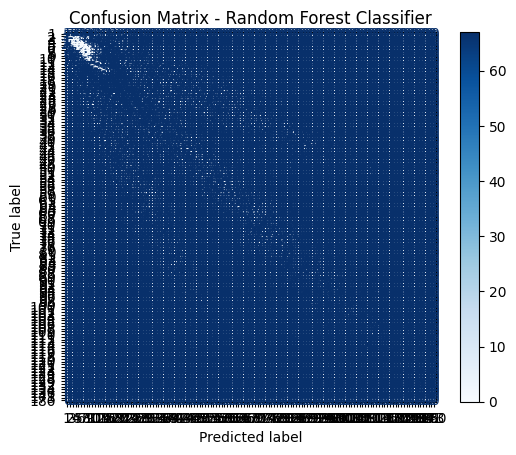

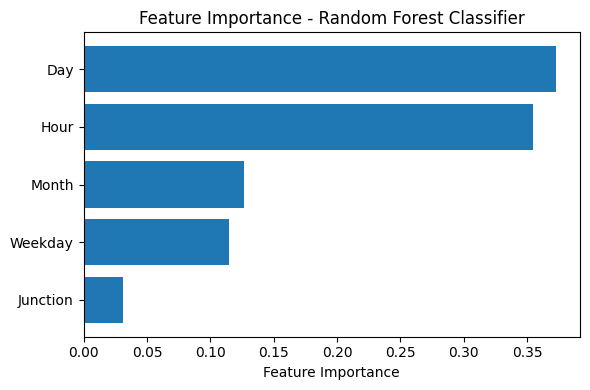

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# ================================
# TRAIN RANDOM FOREST CLASSIFIER
# ================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Train+Test Score on full X,y:", rf.score(X, y))


# ================================
# CONFUSION MATRIX PLOT
# ================================
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# ================================
# FEATURE IMPORTANCE PLOT
# ================================
importances = rf.feature_importances_
feature_names = X_train.columns   # ['Hour', 'Day', 'Month', 'Weekday', 'Junction', ... if any]

indices = np.argsort(importances)

plt.figure(figsize=(6, 4))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest Classifier")
plt.tight_layout()
plt.show()


In [27]:
whos

Variable                     Type                      Data/Info
----------------------------------------------------------------
ALLOWED                      list                      n=4
BytesIO                      type                      <class '_io.BytesIO'>
COCO_TO_YOURS                dict                      n=4
ConfusionMatrixDisplay       type                      <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DecisionTreeClassifier       ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
Image                        module                    <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
LogisticRegression           type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier       ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
RandomForestRegressor        ABCMeta                   <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
SVC      

In [29]:
def categorize_traffic(x):
    if x <= 15:
        return "Low"
    elif x <= 30:
        return "Normal"
    elif x <= 50:
        return "High"
    else:
        return "Heavy"

# Convert y into 4 classes
y_class = y.apply(categorize_traffic)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)


In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


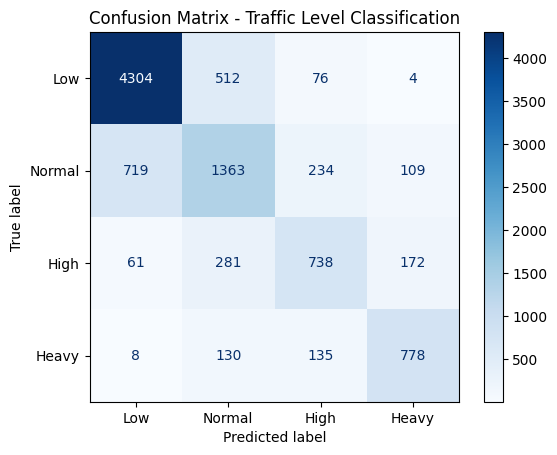


0: 448x640 5 cars, 2 motorcycles, 38.2ms
Speed: 2.3ms preprocess, 38.2ms inference, 25.4ms postprocess per image at shape (1, 3, 448, 640)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["Low", "Normal", "High", "Heavy"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Low", "Normal", "High", "Heavy"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Traffic Level Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
